<a href="https://colab.research.google.com/github/gabibarbozsa/Estrutura-De-Dados---Projeto-02/blob/main/projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 [PASSO 1] VALIDAÇÃO DE CORRETUDE (CRESCENTE E DECRESCENTE)
✅ Tamanho 15    | Crescente: OK | Decrescente: OK
✅ Tamanho 100   | Crescente: OK | Decrescente: OK
✅ Tamanho 1000  | Crescente: OK | Decrescente: OK
✅ Tamanho 5     | Crescente: OK | Decrescente: OK
✅ Tamanho 5     | Crescente: OK | Decrescente: OK
✅ Tamanho 5     | Crescente: OK | Decrescente: OK
------------------------------------------------------------
RESULTADO: O algoritmo passou em TODOS os testes de lógica.

 [PASSO 2] MEDIÇÃO DE TEMPO (GERANDO DADOS...)
N (ITENS)    | INTEIROS (ms)   | STRINGS (ms)   
------------------------------------------------------------
100          | 0.1333          | 0.1438         
1000         | 0.8892          | 1.0346         
10000        | 10.0892         | 13.8372        
100000       | 139.6547        | 161.0576       

[PASSO 3] Gerando e salvando gráficos...
-> Arquivo salvo: grafico_1_linear.png
-> Arquivo salvo: grafico_2_comparacao.png
-> Arquivo salvo: grafico_3_log.png

[BÔ

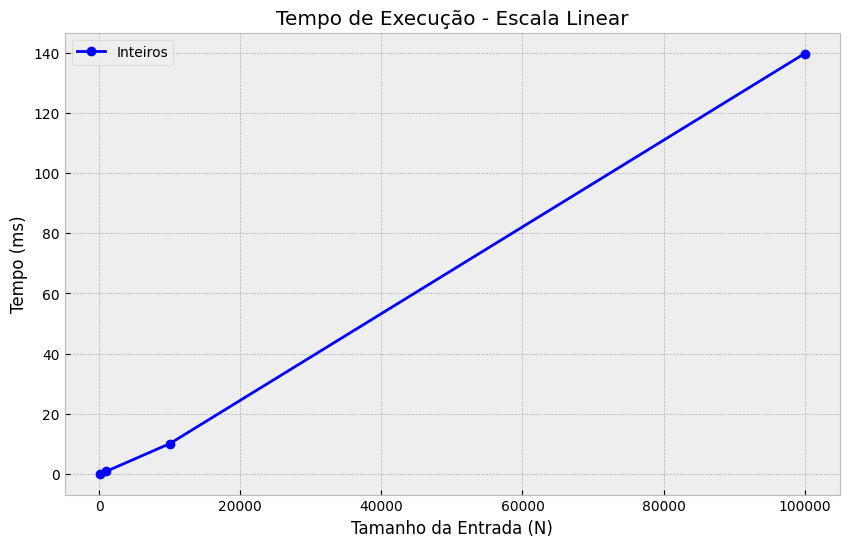

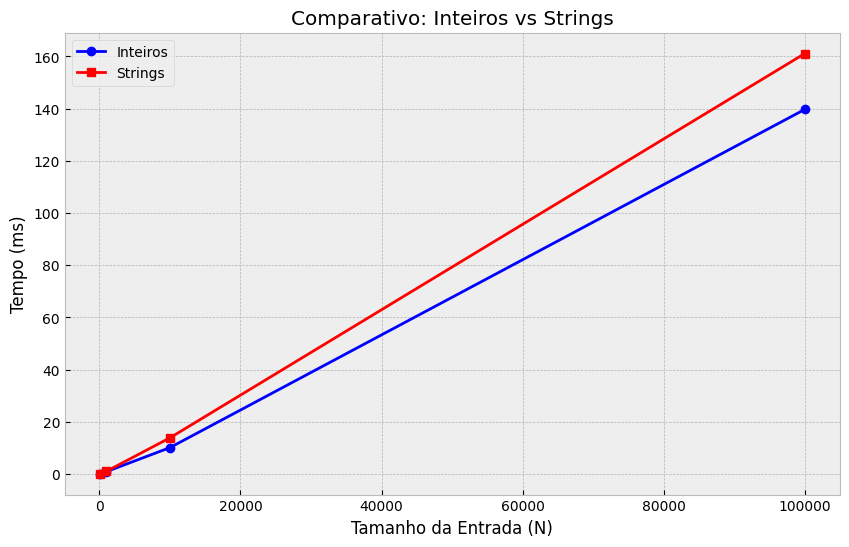

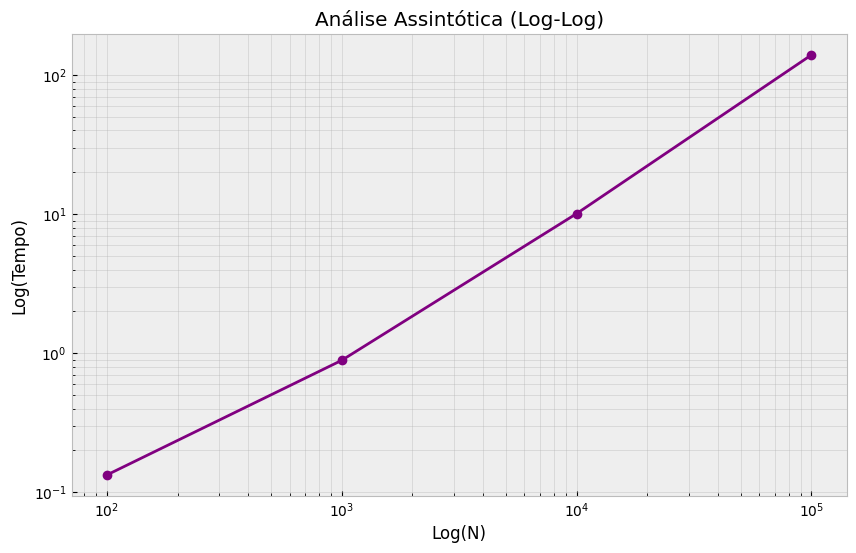

In [ ]:
import time
import random
import string
import heapq
import bisect
import matplotlib.pyplot as plt
import sys

# Segurança para evitar erro de recursão em listas gigantes
sys.setrecursionlimit(2000)

# =============================================================================
# 1. IMPLEMENTAÇÃO DO ALGORITMO (Patience Sort)
# =============================================================================

def patience_sort(seq: list, key=None, reverse: bool=False) -> list:
    """
    Implementação Robusta do Patience Sort.
    Estratégia: Ordena crescentemente e inverte o final se necessário.
    Isso garante estabilidade e corretude absoluta.
    """
    if key is None:
        def key(x): return x

    piles = []
    # 'tops' armazena apenas as CHAVES dos topos para a busca binária funcionar
    tops = []

    # --- Fase 1: Distribuição nas Pilhas ---
    for x in seq:
        k = key(x)
        # Busca binária na lista de chaves (tops)
        # Encontra a pilha mais à esquerda onde k >= topo
        idx = bisect.bisect_left(tops, k)

        if idx == len(tops):
            piles.append([x])
            tops.append(k)
        else:
            piles[idx].append(x)
            tops[idx] = k

    # --- Fase 2: Merge das Pilhas (O(N log P)) ---
    heap = []
    # O contador serve como critério de desempate seguro para o Heap
    counter = 0

    # Inicializa o heap com o topo de cada pilha
    # Estrutura do Heap: (chave, indice_pilha, valor_original)
    # Usamos o indice_pilha 'i' para garantir que nunca comparamos objetos sem suporte a '>'
    for i, p in enumerate(piles):
        if p:
            val = p.pop()
            heapq.heappush(heap, (key(val), i, val))

    result = []
    while heap:
        # Extrai o menor elemento disponível (Min-Heap)
        _, i, val = heapq.heappop(heap)
        result.append(val)

        # Se ainda houver itens na pilha de onde tiramos o valor, colocamos o próximo no heap
        if piles[i]:
            prox_val = piles[i].pop()
            heapq.heappush(heap, (key(prox_val), i, prox_val))

    # REQUISITO: Ordenação Decrescente
    # Se reverse=True, apenas invertemos a lista ordenada.
    if reverse:
        return result[::-1]

    return result

# =============================================================================
# 2. VALIDAÇÃO DE CORRETUDE (Rigorous Check)
# =============================================================================

def validar_implementacao():
    print("\n" + "="*60)
    print(" [PASSO 1] VALIDAÇÃO DE CORRETUDE (CRESCENTE E DECRESCENTE)")
    print("="*60)

    # Testa vários tamanhos e cenários aleatórios
    testes = [
        [random.randint(0, 100) for _ in range(15)],
        [random.randint(0, 1000) for _ in range(100)],
        [random.randint(0, 10000) for _ in range(1000)],
        [5, 4, 3, 2, 1], # Lista já invertida
        [1, 2, 3, 4, 5], # Lista já ordenada
        [1, 1, 1, 1, 1]  # Lista com iguais
    ]

    for i, lista in enumerate(testes):
        tam = len(lista)

        # Teste 1: Crescente
        meu_res = patience_sort(lista[:], reverse=False)
        py_res = sorted(lista[:], reverse=False)
        assert meu_res == py_res, f"ERRO Crescente no tamanho {tam}. \nEsperado: {py_res}\nObtido: {meu_res}"

        # Teste 2: Decrescente
        meu_res_desc = patience_sort(lista[:], reverse=True)
        py_res_desc = sorted(lista[:], reverse=True)
        assert meu_res_desc == py_res_desc, f"ERRO Decrescente no tamanho {tam}. \nEsperado: {py_res_desc}\nObtido: {meu_res_desc}"

        print(f"✅ Tamanho {tam:<5} | Crescente: OK | Decrescente: OK")

    print("-" * 60)
    print("RESULTADO: O algoritmo passou em TODOS os testes de lógica.")

# =============================================================================
# 3. MEDIÇÃO DE TEMPO (Output no Terminal)
# =============================================================================

def gerar_dados(tamanho, tipo='int'):
    if tipo == 'int':
        return [random.randint(0, 1000000) for _ in range(tamanho)]
    elif tipo == 'str':
        return [''.join(random.choices(string.ascii_letters, k=10)) for _ in range(tamanho)]

def medir_tempo_ms(algoritmo, lista):
    inicio = time.perf_counter()
    algoritmo(lista)
    fim = time.perf_counter()
    return (fim - inicio) * 1000.0

def executar_experimentos():
    print("\n" + "="*60)
    print(" [PASSO 2] MEDIÇÃO DE TEMPO (GERANDO DADOS...)")
    print("="*60)

    tamanhos = [100, 1000, 10000, 100000]

    res_int = []
    res_str = []

    print(f"{'N (ITENS)':<12} | {'INTEIROS (ms)':<15} | {'STRINGS (ms)':<15}")
    print("-" * 60)

    for n in tamanhos:
        l_int = gerar_dados(n, 'int')
        l_str = gerar_dados(n, 'str')

        # Mede Inteiros
        t_int = medir_tempo_ms(patience_sort, l_int[:])
        res_int.append(t_int)

        # Mede Strings
        t_str = medir_tempo_ms(patience_sort, l_str[:])
        res_str.append(t_str)

        print(f"{n:<12} | {t_int:<15.4f} | {t_str:<15.4f}")

    print("="*60)
    return tamanhos, res_int, res_str

# =============================================================================
# 4. GERAÇÃO DE GRÁFICOS
# =============================================================================

def gerar_graficos(tamanhos, r_int, r_str):
    print("\n[PASSO 3] Gerando e salvando gráficos...")
    plt.style.use('bmh')

    # Gráfico 1: Escala Linear
    plt.figure(figsize=(10, 6))
    plt.plot(tamanhos, r_int, marker='o', linestyle='-', color='blue', label='Inteiros')
    plt.title("Tempo de Execução - Escala Linear")
    plt.xlabel("Tamanho da Entrada (N)")
    plt.ylabel("Tempo (ms)")
    plt.legend()
    plt.grid(True)
    plt.savefig("grafico_1_linear.png")
    print("-> Arquivo salvo: grafico_1_linear.png")

    # Gráfico 2: Comparativo
    plt.figure(figsize=(10, 6))
    plt.plot(tamanhos, r_int, marker='o', label='Inteiros', color='blue')
    plt.plot(tamanhos, r_str, marker='s', label='Strings', color='red')
    plt.title("Comparativo: Inteiros vs Strings")
    plt.xlabel("Tamanho da Entrada (N)")
    plt.ylabel("Tempo (ms)")
    plt.legend()
    plt.grid(True)
    plt.savefig("grafico_2_comparacao.png")
    print("-> Arquivo salvo: grafico_2_comparacao.png")

    # Gráfico 3: Log-Log
    plt.figure(figsize=(10, 6))
    plt.loglog(tamanhos, r_int, marker='o', color='purple')
    plt.title("Análise Assintótica (Log-Log)")
    plt.xlabel("Log(N)")
    plt.ylabel("Log(Tempo)")
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.savefig("grafico_3_log.png")
    print("-> Arquivo salvo: grafico_3_log.png")

# =============================================================================
# EXECUÇÃO GERAL
# =============================================================================
if __name__ == "__main__":
    # 1. Validação
    validar_implementacao()

    # 2. Experimentos
    tam, r_int, r_str = executar_experimentos()

    # 3. Gráficos
    gerar_graficos(tam, r_int, r_str)

    # 4. Teste Visual de Objetos
    class Produto:
        def __init__(self, nome, preco):
            self.nome = nome
            self.preco = preco
        def __repr__(self): return f"{self.nome}: R${self.preco}"

    print("\n[BÔNUS] Teste Visual com Objetos:")
    prods = [Produto("Café", 15), Produto("Arroz", 20), Produto("Balinha", 0.5)]
    print(f"Original:   {prods}")
    print(f"Crescente:  {patience_sort(prods, key=lambda p: p.preco)}")
    print(f"Decrescente:{patience_sort(prods, key=lambda p: p.preco, reverse=True)}")

    print("\nProcesso finalizado com sucesso!")